# StrongCNN Catalog

This notebook is provided to help _you_ look at the database. There are a couple useful (at least in my experience) widgets for visualizing the dataset, as well as a simple example for how you can divy up the catalog to examine other properties.

In the box below, cd to the directory containing this notebook, the catalogs, and the cutouts.

In [42]:
cd /nfs/slac/g/ki/ki18/cpd/swap_catalog_diagnostics/

/nfs/slac/g/ki/ki18/cpd/swap_catalog_diagnostics


### TODO: With public release, the annoated and knownlens catalogs will be removed.

In [58]:
%matplotlib inline
import pandas as pd
from notebook_helper import *

knownlens_catalog = pd.read_csv('./knownlens.csv', index_col=0)
annotated_catalog = pd.read_csv('./annotated_catalog.csv', index_col=0)
cluster_catalog = pd.read_csv('./catalog.csv', index_col=0)

`mpld3` is not strictly needed to make the below code work, but it has helpful tools like a zoom function.

In [53]:
import mpld3
mpld3.enable_notebook()

Let's see what columns we have in our catalog:

In [61]:
print(cluster_catalog.columns)

Index([u'ID', u'ZooID', u'location', u'mean_probability', u'category', u'kind', u'field_flavor', u'state', u'status', u'truth', u'stage', u'object_id', u'x', u'y', u'markers_in_object', u'skill_sum', u'markers_in_field', u'people_marking_objects', u'people_marking_field', u'people_looking_at_field', u'object_size', u'field_name', u'object_name', u'object_flavor'], dtype='object')


In `notebook_helper.py` are a couple IPython widgets to get you started looking at the catalogs. `examine_catalog` lets you hierarchically break up the the entries in the catalog.

In [49]:
examine_catalog(cluster_catalog)

stage  field_flavor     object_flavor            
1      dud              dud                          1281
       lensed galaxy    dud                           398
                        known lens                      9
                        simulated lensed galaxy      1915
       lensed quasar    dud                           303
                        known lens                      9
                        simulated lensed quasar      1960
       lensing cluster  dud                           298
                        known lens                     16
                        simulated lensing cluster    1896
2      dud              dud                           248
       lensed galaxy    dud                            25
                        known lens                      1
                        simulated lensed galaxy       148
       lensing cluster  dud                            13
                        simulated lensing cluster       8
       test           

With `examine_cutouts` we can look at the individual cutouts as well as some of their properties. See the README.md for details on what each column means!

# TODO: In the public release, examine_cutouts_diagnostic will become examine_cutouts.

ZooID                      ASW0000o2y
object_id                       11511
stage                               2
field_flavor                     test
object_flavor                 unknown
status                      undecided
markers_in_object                  10
markers_in_field                   11
people_marking_objects              7
people_marking_field                8
people_looking_at_field            49
object_size                  10.56361
mean_probability            0.1709238
x                            412.6157
y                            220.3417
Name: 11511, dtype: object

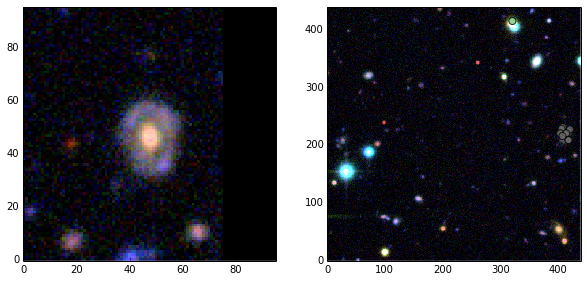

In [54]:
examine_cutouts_diagnostic(cluster_catalog, annotated_catalog,
                plot_alpha=False, invert_color=False, color_by_user=False, plot_points=True)

# Looking at specific entries in the catalog.

We can also filter out our catalog to look at specific subtypes. Let's look at all entries with `cluster_type = known lens`. We'll call it a `cluster_knownlens_catalog`.

In [57]:
cluster_knownlens_catalog = cluster_catalog[cluster_catalog['object_flavor'] == 'known lens']

In [16]:
examine_catalog(cluster_knownlens_catalog)

stage  flavor           cluster_type
1      lensed galaxy    known lens        9
       lensed quasar    known lens        9
       lensing cluster  known lens       16
2      lensed galaxy    known lens        1
       test             known lens      102
dtype: int64


ZooID                   ASW000506n
cluster_id                   13872
stage                            2
flavor                        test
cluster_type            known lens
status                   undecided
num_markers                      4
tot_markers                     11
cluster_marked_looks             4
total_marked_looks               7
total_looks                     50
dispersion                2.879669
mean_probability         0.1385119
x                         294.6087
y                          24.0663
Name: 13872, dtype: object

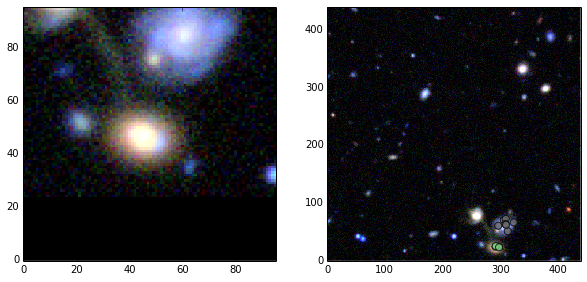

In [17]:
examine_cutouts_diagnostic(cluster_knownlens_catalog, annotated_catalog,
                plot_alpha=False, invert_color=False, color_by_user=False, plot_points=True)

Of course, we can also make multiple cuts at once. Let's find the known lenses that `SpaceWarps` appeared to miss!

ZooID                      ASW0005exg
object_id                        9998
stage                               2
field_flavor                     test
object_flavor              known lens
status                      undecided
markers_in_object                  18
markers_in_field                   20
people_marking_objects             10
people_marking_field               12
people_looking_at_field            50
object_size                  16.69838
mean_probability            0.2757075
x                            92.86744
y                            116.4605
Name: 9998, dtype: object

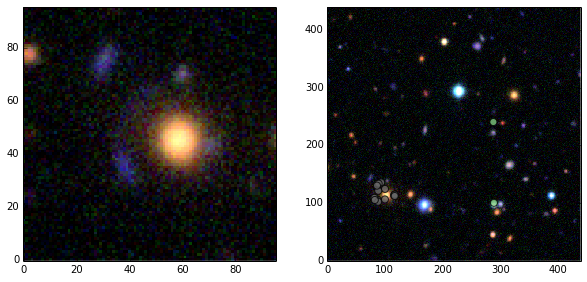

In [56]:
weak_knownlens_catalog = cluster_catalog[(cluster_catalog['object_flavor'] == 'known lens') &
                                          (cluster_catalog['mean_probability'] < 0.3)]
examine_cutouts_diagnostic(weak_knownlens_catalog, annotated_catalog,
                plot_alpha=False, invert_color=False, color_by_user=False, plot_points=True)

We also might want to know if there are any known lenses that did not make it to the cutout catalog. I therefore match the ZooIDs to the ZooIDs of the annotated catalog, which contains all the fields I used for creating the clusters. The only fields excluded from the cutout creation were the `test` fields in stage 1.

In [62]:
knownlens_catalog[~knownlens_catalog['ZooID'].isin(annotated_catalog['ZooID'])]

,CFHTID,x,y,ZooID
2,CFHTLS_001_0923,237.211,174.515,ASW0000xp3
5,CFHTLS_004_1004,226.901,377.994,ASW0001esp
8,CFHTLS_005_1297,210.151,6.932,ASW000157y
22,CFHTLS_024_1490,326.785,122.924,ASW0002ac6
23,CFHTLS_024_0941,234.393,405.954,ASW0002brp
24,CFHTLS_024_0942,234.393,19.954,ASW0002b97
25,CFHTLS_024_0612,389.388,435.027,ASW0002bqt
26,CFHTLS_024_0613,389.388,49.027,ASW0002c1q
27,CFHTLS_024_0662,3.388,435.027,ASW0002b8b
28,CFHTLS_024_0663,3.388,49.027,ASW0002aq8


We see that there are 77 objects not in our catalog. There are only two sets of objects I exclude: all stage 1 test objects, and all objects with exactly zero clicks.